In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.0001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'mean_square_error', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 2000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)


Iteration 1596/2000: 	2.447845740661113
itr 1597
Iteration 1597/2000: 	2.44784455392504
itr 1598
Iteration 1598/2000: 	2.447843364778764
itr 1599
Iteration 1599/2000: 	2.4478421756819606
itr 1600
Iteration 1600/2000: 	2.4478410060284386
itr 1601
Iteration 1601/2000: 	2.447839896478375
itr 1602
Iteration 1602/2000: 	2.4478387873864205
itr 1603
Iteration 1603/2000: 	2.4478376944142513
itr 1604
Iteration 1604/2000: 	2.4478366041511674
itr 1605
Iteration 1605/2000: 	2.447835509585685
itr 1606
Iteration 1606/2000: 	2.44783442188336
itr 1607
Iteration 1607/2000: 	2.4478333580541136
itr 1608
Iteration 1608/2000: 	2.4478322876282848
itr 1609
Iteration 1609/2000: 	2.447831215033302
itr 1610
Iteration 1610/2000: 	2.447830160504461
itr 1611
Iteration 1611/2000: 	2.4478291091211584
itr 1612
Iteration 1612/2000: 	2.4478280448550973
itr 1613
Iteration 1613/2000: 	2.4478270123223798
itr 1614
Iteration 1614/2000: 	2.4478259811531258
itr 1615
Iteration 1615/2000: 	2.4478249333732554
itr 1616
Iteration

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

19967, 2.451140641716964, 2.4511283566281334, 2.4511161130771115, 2.4511038844058577, 2.4510916795417113, 2.4510794848861766, 2.4510673325302506, 2.4510551903054867, 2.4510430681376367, 2.451030980692759, 2.451018905611306, 2.4510068612941023, 2.4509948302390065, 2.4509828314404984, 2.4509708465821887, 2.450958901882424, 2.4509469555212116, 2.4509350331488093, 2.450923156476155, 2.4509112786924723, 2.450899435764491, 2.4508876114934632, 2.4508758129178267, 2.450864038229567, 2.450852287014732, 2.4508411345372614, 2.4508300052733056, 2.4508189027704548, 2.4508078206658213, 2.4507967449655563, 2.4507857049414485, 2.4507746868814935, 2.4507636817214045, 2.4507526918876157, 2.4507417336431594, 2.450730790577379, 2.450719873792863, 2.450708968101964, 2.4506980875660256, 2.450687226597992, 2.4506763870587434, 2.450665558600048, 2.450654764374419, 2.4506439849588335, 2.4506332265815245, 2.450622476972923, 2.4506117742748437, 2.4506010720456266, 2.4505903897192463, 2.450579730457547, 2.4505690

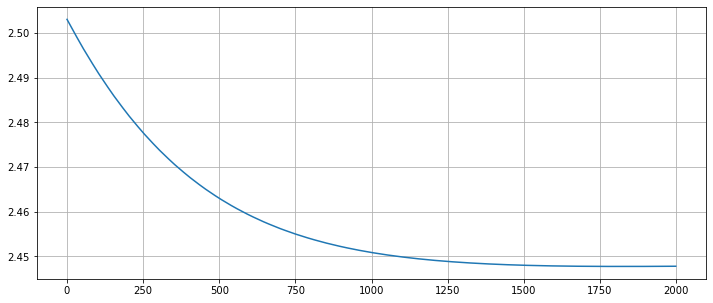

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [array([0.4909142], dtype=float32), array([0.2890564], dtype=float32), array([0.01283946], dtype=float32)]
[1. 0. 0.] <-> [array([0.16971406], dtype=float32), array([0.17826153], dtype=float32), array([0.00803321], dtype=float32)]
[0. 0. 1.] <-> [array([0.49257827], dtype=float32), array([0.29030585], dtype=float32), array([0.01281368], dtype=float32)]
[1. 0. 0.] <-> [array([0.48552704], dtype=float32), array([0.2812507], dtype=float32), array([0.01275143], dtype=float32)]
[0. 0. 1.] <-> [array([0.4926256], dtype=float32), array([0.2903508], dtype=float32), array([0.01281203], dtype=float32)]
[1. 0. 0.] <-> [array([0.13392298], dtype=float32), array([0.15686755], dtype=float32), array([0.00666464], dtype=float32)]
[1. 0. 0.] <-> [array([0.13693793], dtype=float32), array([0.14807922], dtype=float32), array([0.00669794], dtype=float32)]
[1. 0. 0.] <-> [array([0.46641034], dtype=float32), array([0.25602484], dtype=float32), array([0.01263818], dtype=float32)]
[1. 0. 0.] <-